# **PROYECTO DE GRADO - MAESTRIA EN CIENCIA DE DATOS**
## Segmentación de profesionales de la salud del sector farmacéutico
### Santiago Reyes Zabaleta


## K-Means
-------------------------------------------------------------------------------------

In [27]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Paso 1: Cargar los datos
data = pd.read_csv('data_cleaned.csv')

### Split del DataFrame: Consultas Benignas y Malignas

#### Justificación:
Por conocimiento del negocio, se entiende que las consultas benignas y malignas presentan dinámicas y comportamientos diferentes en términos de:
- Especialidades involucradas.
- Cantidad de pacientes atendidos.
- Porcentaje de consultas.

#### Beneficio:
Esta separación permite:
- Realizar una **clusterización individual** en cada conjunto.
- Identificar patrones específicos y relevantes para cada tipo de consulta.
- Crear estrategias más personalizadas y eficientes, alineadas con las características de cada grupo.

#### Acción:
Se recomienda siempre dividir el DataFrame principal según el tipo de consulta antes de proceder a cualquier análisis avanzado como la clusterización.

## Clusterización K-Means

#### Pasos:

1. **Preprocesamiento de Datos**:
   - Seleccionar las variables más relevantes para la clusterización, como:
     - Cantidad de pacientes.
     - Porcentaje de consulta.
     - Especialidad (codificada si es necesario).
   - Normalizar las variables para garantizar que todas contribuyan de manera equitativa al modelo de clusterización.

2. **Selección del Algoritmo de Clusterización**:
   - Utilizar algoritmos como:
     - **K-means**: Requiere determinar el número de clústeres óptimo.
     - **DBSCAN**: Para identificar grupos basados en densidad, útil si los datos tienen ruido.
     - **Jerárquico**: Para observar relaciones entre los clústeres.
   - Decidir el algoritmo más adecuado según las características de los datos.

3. **Determinación del Número Óptimo de Clústeres**:
   - Utilizar técnicas como el codo ("Elbow Method") o el coeficiente de silueta para determinar el número ideal de clústeres (si corresponde al algoritmo elegido).

4. **Aplicación del Modelo**:
   - Entrenar el modelo con las variables seleccionadas y el número óptimo de clústeres.
   - Asignar cada registro a un clúster.

5. **Evaluación de Resultados**:
   - Visualizar los clústeres mediante gráficos.
   - Analizar las características de cada clúster:
     - ¿Qué los define?
     - ¿Qué patrones emergen?
   - Evaluar métricas como la inercia (para K-means) o el coeficiente de silueta.

6. **Interpretación y Aplicación**:
   - Traducir los resultados en acciones o insights prácticos:
     - Identificar grupos prioritarios.
     - Ajustar estrategias según las necesidades de cada clúster.

#### Consideraciones:
- Escalar correctamente las variables antes de aplicar cualquier modelo.
- Iterar y ajustar parámetros según los resultados iniciales.

## Análisis método del codo

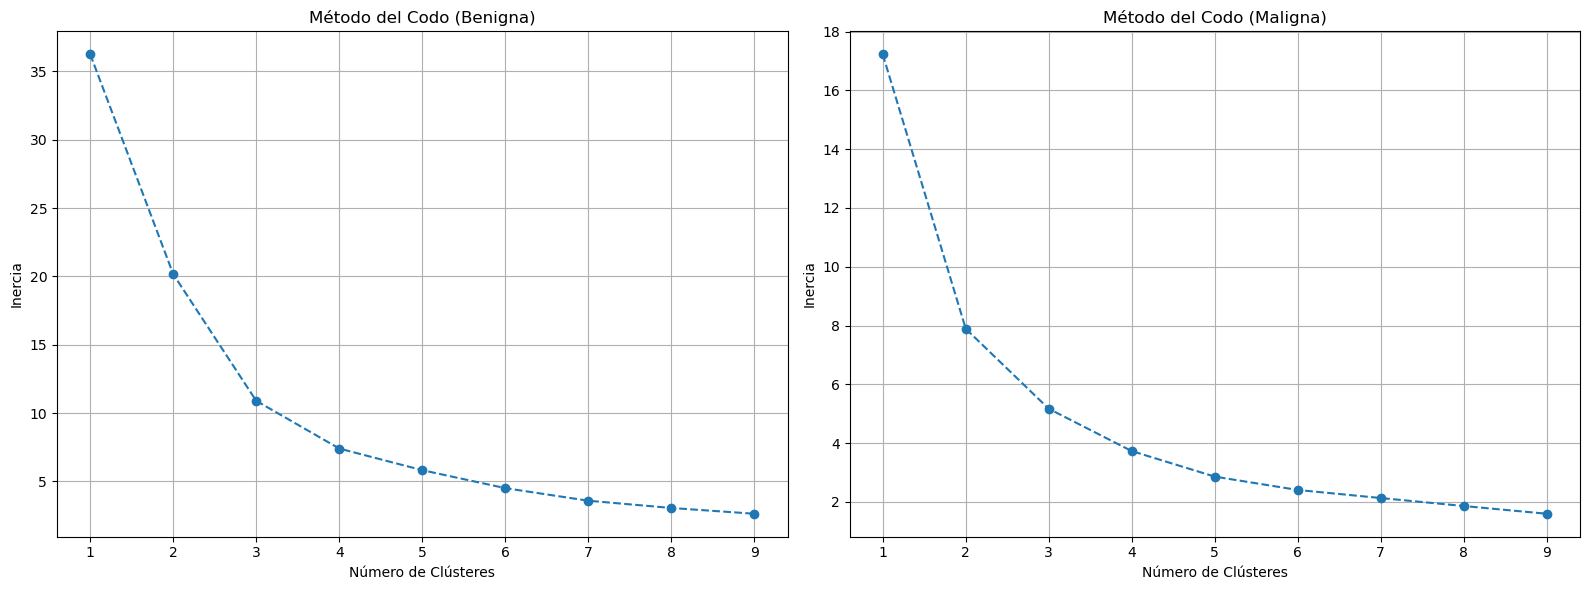

In [29]:
# Crear un contenedor para dos gráficos en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modificar la función para aceptar un eje específico
def analisis_codo(ax, data, tipo_consulta):
    # Filtrar los datos por tipo de consulta
    df_filtered = data[data['tipo_consulta'] == tipo_consulta]

    # Seleccionar las columnas numéricas relevantes
    features = df_filtered[['Cantidad_pacientes', 'porcentaje_consulta']]

    # Escalar los datos con MinMaxScaler
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Método del codo para determinar el número óptimo de clústeres
    inertia = []
    range_n_clusters = range(1, 10)
    for k in range_n_clusters:
        kmeans = KMeans(k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

    # Graficar el método del codo en el eje proporcionado
    ax.plot(range_n_clusters, inertia, marker='o', linestyle='--')
    ax.set_title(f'Método del Codo ({tipo_consulta.capitalize()})')
    ax.set_xlabel('Número de Clústeres')
    ax.set_ylabel('Inercia')
    ax.grid()

# Llamar a la función para cada tipo de consulta y pasar los ejes correspondientes
analisis_codo(axes[0], data, 'benigna')
analisis_codo(axes[1], data, 'maligna')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

## Conclusión del Análisis del Método del Codo

1. **Forma del gráfico**:
   - La inercia disminuye rápidamente al principio (de \( k=1 \) a \( k=3 \)).
   - A partir de \( k=3 \) o \( k=4 \), la disminución de la inercia es menos pronunciada, lo que sugiere que agregar más clusters no mejora significativamente la cohesión dentro de los grupos.

2. **Número de clusters recomendado**:
   - El "codo" más claro parece estar en \( k=3 \). Esto indica que dividir los datos en 3 clusters logra un buen balance entre simplicidad del modelo y agrupamiento efectivo.

3. **Posible alternativa**:
   - Aunque \( k=4 \) también muestra una ligera mejora, es menos notable en comparación con \( k=3 \). Si hay razones específicas desde el punto de vista del negocio o dominio para considerar más grupos, podría evaluarse.

### Conclusión
El análisis sugiere que **3 clusters** es una elección razonable para el agrupamiento, ya que captura la estructura principal de los datos sin agregar complejidad innecesaria.

## K-Means

Centroides para Benigna:
   Cantidad_pacientes  porcentaje_consulta
0           36.441441             0.954279
1           44.893617             0.373404
2          115.921053             0.792105
Centroides para Maligna:
   Cantidad_pacientes  porcentaje_consulta
0          131.717172             0.882828
1           61.491228             0.890000
2           65.000000             0.603333


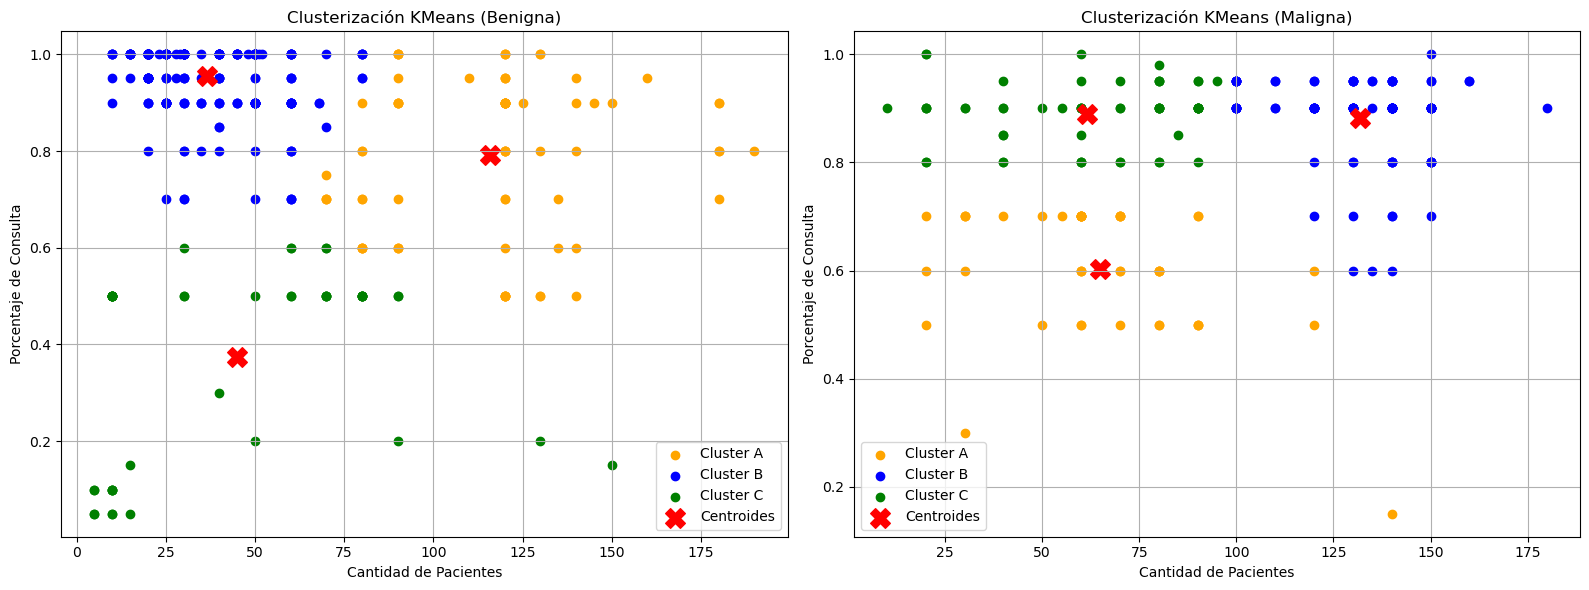

In [30]:
# Crear contenedor para dos gráficas en una fila con dos columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modificar la función para aceptar un eje específico
def clusterize_data(ax, data, tipo_consulta, n_clusters):
    # Filtrar los datos por tipo de consulta
    df_filtered = data[data['tipo_consulta'] == tipo_consulta]

    # Seleccionar las columnas numéricas relevantes
    features = df_filtered[['Cantidad_pacientes', 'porcentaje_consulta']]

    # Escalar los datos con MinMaxScaler
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Aplicar KMeans con el número de clústeres especificado
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_filtered['cluster'] = kmeans.fit_predict(features_scaled)

    # Obtener y mostrar los centroides
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=['Cantidad_pacientes', 'porcentaje_consulta'])
    print(f"Centroides para {tipo_consulta.capitalize()}:")
    print(centroids_df)

    # Reetiquetar los clústeres para 'benigna'
    if tipo_consulta == 'benigna':
        cluster_labels = {0: 'Cluster B', 1: 'Cluster C', 2: 'Cluster A'}
        df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)
    # Reetiquetar los clústeres para 'maligna'
    elif tipo_consulta == 'maligna':
        cluster_labels = {2: 'Cluster A', 0: 'Cluster B', 1: 'Cluster C'}
        df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)

    # Agregar los valores de los centroides al DataFrame usando las etiquetas reetiquetadas
    label_to_centroid = {
        cluster_labels[original_label]: centroid for original_label, centroid in enumerate(centroids)
    }
    df_filtered['centroid_cantidad_pacientes'] = df_filtered['cluster_label'].map(lambda x: label_to_centroid[x][0])
    df_filtered['centroid_porcentaje_consulta'] = df_filtered['cluster_label'].map(lambda x: label_to_centroid[x][1])

    # Graficar los resultados de los clústeres con datos originales en el eje proporcionado
    colors = {'Cluster A': 'orange', 'Cluster B': 'blue', 'Cluster C': 'green'}
    for cluster_label, color in colors.items():
        cluster_data = df_filtered[df_filtered['cluster_label'] == cluster_label]
        ax.scatter(
            cluster_data['Cantidad_pacientes'],
            cluster_data['porcentaje_consulta'],
            label=f'{cluster_label}',
            color=color
        )

    # Graficar los centroides con datos originales
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroides')
    ax.set_title(f'Clusterización KMeans ({tipo_consulta.capitalize()})')
    ax.set_xlabel('Cantidad de Pacientes')
    ax.set_ylabel('Porcentaje de Consulta')
    ax.legend()
    ax.grid()

    return df_filtered

# Generar las gráficas en los ejes
df_benigna_clustered = clusterize_data(axes[0], data, 'benigna', 3)
df_maligna_clustered = clusterize_data(axes[1], data, 'maligna', 3)

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

Silhouette Score para Benigna: 0.57
Centroides para Benigna:
   Cantidad_pacientes  porcentaje_consulta
0           36.441441             0.954279
1           44.893617             0.373404
2          115.921053             0.792105
Silhouette Score para Maligna: 0.48
Centroides para Maligna:
   Cantidad_pacientes  porcentaje_consulta
0          131.717172             0.882828
1           61.491228             0.890000
2           65.000000             0.603333


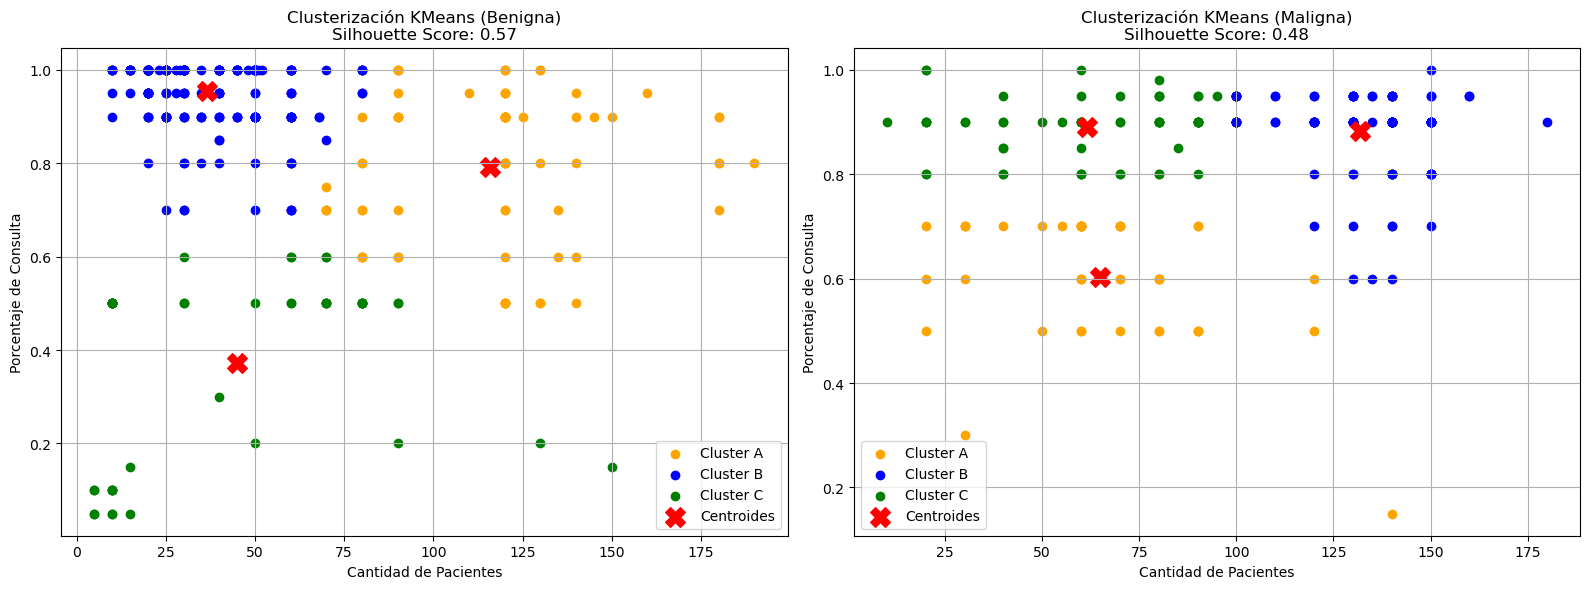

In [31]:
# Crear contenedor para dos gráficas en una fila con dos columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modificar la función para aceptar un eje específico
def clusterize_data(ax, data, tipo_consulta, n_clusters):
    # Filtrar los datos por tipo de consulta
    df_filtered = data[data['tipo_consulta'] == tipo_consulta]

    # Seleccionar las columnas numéricas relevantes
    features = df_filtered[['Cantidad_pacientes', 'porcentaje_consulta']]

    # Escalar los datos con MinMaxScaler
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Aplicar KMeans con el número de clústeres especificado
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_filtered['cluster'] = kmeans.fit_predict(features_scaled)

    # Calcular el Silhouette Score
    if len(set(df_filtered['cluster'])) > 1:  # Verificar que hay más de un clúster
        silhouette_avg = silhouette_score(features_scaled, df_filtered['cluster'])
        print(f"Silhouette Score para {tipo_consulta.capitalize()}: {silhouette_avg:.2f}")
    else:
        silhouette_avg = None
        print(f"Silhouette Score no se puede calcular para {tipo_consulta.capitalize()} (un único clúster).")

    # Obtener y mostrar los centroides
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=['Cantidad_pacientes', 'porcentaje_consulta'])
    print(f"Centroides para {tipo_consulta.capitalize()}:")
    print(centroids_df)

    # Reetiquetar los clústeres para 'benigna'
    if tipo_consulta == 'benigna':
        cluster_labels = {0: 'Cluster B', 1: 'Cluster C', 2: 'Cluster A'}
        df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)
    # Reetiquetar los clústeres para 'maligna'
    elif tipo_consulta == 'maligna':
        cluster_labels = {2: 'Cluster A', 0: 'Cluster B', 1: 'Cluster C'}
        df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)

    # Agregar los valores de los centroides al DataFrame usando las etiquetas reetiquetadas
    label_to_centroid = {
        cluster_labels[original_label]: centroid for original_label, centroid in enumerate(centroids)
    }
    df_filtered['centroid_cantidad_pacientes'] = df_filtered['cluster_label'].map(lambda x: label_to_centroid[x][0])
    df_filtered['centroid_porcentaje_consulta'] = df_filtered['cluster_label'].map(lambda x: label_to_centroid[x][1])

    # Graficar los resultados de los clústeres con datos originales en el eje proporcionado
    colors = {'Cluster A': 'orange', 'Cluster B': 'blue', 'Cluster C': 'green'}
    for cluster_label, color in colors.items():
        cluster_data = df_filtered[df_filtered['cluster_label'] == cluster_label]
        ax.scatter(
            cluster_data['Cantidad_pacientes'],
            cluster_data['porcentaje_consulta'],
            label=f'{cluster_label}',
            color=color
        )

    # Graficar los centroides con datos originales
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroides')
    ax.set_title(f'Clusterización KMeans ({tipo_consulta.capitalize()})\nSilhouette Score: {silhouette_avg:.2f}' if silhouette_avg else f'Clusterización KMeans ({tipo_consulta.capitalize()})')
    ax.set_xlabel('Cantidad de Pacientes')
    ax.set_ylabel('Porcentaje de Consulta')
    ax.legend()
    ax.grid()

    return df_filtered

# Generar las gráficas en los ejes
df_benigna_clustered = clusterize_data(axes[0], data, 'benigna', 3)
df_maligna_clustered = clusterize_data(axes[1], data, 'maligna', 3)

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()




In [32]:
from sklearn.metrics import silhouette_score

# Función para calcular y mostrar métricas
def calcular_metricas(data, tipo_consulta, n_clusters):
    # Filtrar los datos por tipo de consulta
    df_filtered = data[data['tipo_consulta'] == tipo_consulta]

    # Seleccionar las columnas numéricas relevantes
    features = df_filtered[['Cantidad_pacientes', 'porcentaje_consulta']]

    # Escalar los datos con MinMaxScaler
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Aplicar KMeans con el número de clústeres especificado
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_scaled)

    # Calcular métricas
    inercia = kmeans.inertia_
    silueta = silhouette_score(features_scaled, labels)

    # Mostrar resultados
    print(f"Métricas para {tipo_consulta.capitalize()}:")
    print(f"- Inercia (Compactación): {inercia:.2f}")
    print(f"- Coeficiente de Silueta (Separación): {silueta:.2f}")
    print()

# Calcular métricas para datos benignos y malignos
calcular_metricas(data, 'benigna', 3)
calcular_metricas(data, 'maligna', 3)

Métricas para Benigna:
- Inercia (Compactación): 10.90
- Coeficiente de Silueta (Separación): 0.57

Métricas para Maligna:
- Inercia (Compactación): 5.17
- Coeficiente de Silueta (Separación): 0.48



# Interpretación de Métricas de Clusterización

## **1. Métricas para Benigna**
- **Inercia (Compactación): 10.90**
  - La inercia mide la suma de las distancias cuadradas de los puntos al centroide de su clúster.
  - Una inercia más alta (en comparación con los datos malignos) indica que los clústeres están más dispersos o contienen mayor variabilidad interna.
- **Coeficiente de Silueta (Separación): 0.57**
  - Un coeficiente de 0.57 indica que los clústeres están razonablemente bien separados y los puntos están bien agrupados dentro de sus respectivos clústeres.
  - Esto coincide con lo observado en el gráfico: los clústeres benignos tienen una buena separación visual.

---

## **2. Métricas para Maligna**
- **Inercia (Compactación): 5.17**
  - La inercia más baja sugiere que los clústeres son más compactos en comparación con los datos benignos.
  - Esto podría deberse a que los puntos malignos están más agrupados en ciertas áreas del espacio.
- **Coeficiente de Silueta (Separación): 0.48**
  - Un valor más bajo indica que los clústeres están menos definidos, con una mayor superposición entre ellos.
  - Esto coincide con el gráfico, donde se observa mayor mezcla entre los clústeres malignos.

---

## **Comparación de Benigna vs. Maligna**
1. **Separación de Clústeres**:
   - Los datos benignos muestran clústeres con mejor separación y una silueta superior, lo que indica grupos más bien definidos.
   - Los datos malignos presentan clústeres menos separados, probablemente debido a características compartidas entre grupos.

2. **Compactación (Inercia)**:
   - Los clústeres malignos son más compactos (menor inercia), pero esto no necesariamente implica que estén bien separados.


In [33]:
df_benigna_clustered.to_csv('output_benigna_Kmeans.csv', index=False)
df_maligna_clustered.to_csv('output_maligna_Kmeans.csv', index=False)

In [34]:
def combinar_dataframes(df_benigna, df_maligna):
    # Agregar una columna indicando el tipo de consulta
    df_benigna['tipo_consulta'] = 'benigna'
    df_maligna['tipo_consulta'] = 'maligna'

    # Combinar ambos DataFrames
    df_combinado = pd.concat([df_benigna, df_maligna], ignore_index=True)

    return df_combinado

# Llamar a la función
df_combinado = combinar_dataframes(df_benigna_clustered, df_maligna_clustered)

In [35]:
df_combinado.to_csv('output_Combinado_Kmeans.csv', index=False)

In [36]:
# Análisis del DataFrame combinado
# Contar la distribución de tipos de consulta y clústeres
tipo_consulta_counts = df_combinado['tipo_consulta'].value_counts()
cluster_label_counts = df_combinado['cluster_label'].value_counts()

# Análisis cruzado entre especialidades y clústeres
especialidad_cluster_counts = pd.crosstab(df_combinado['especialidad'], df_combinado['cluster_label'])

# Añadir columna de totales por fila (especialidad) y total por clúster
especialidad_cluster_counts['Total'] = especialidad_cluster_counts.sum(axis=1)
especialidad_cluster_counts.loc['Total'] = especialidad_cluster_counts.sum(axis=0)

# Ordenar la tabla por la columna de totales en orden descendente
especialidad_cluster_counts_sorted = especialidad_cluster_counts.sort_values(by='Total', ascending=False)


In [18]:
especialidad_cluster_counts_sorted

cluster_label,Cluster A,Cluster B,Cluster C,Total
especialidad,,,,
Total,121,321,104,546
HEMATOLOGO,46,53,40,139
PEDIATRA,7,74,10,91
HEMATOLOGO PEDIATRA,30,46,14,90
GENETISTA,11,51,4,66
HEMATONCOLOGO,9,30,16,55
MEDICO GENERAL,6,10,13,29
MEDICO INTERNISTA,9,13,1,23
ORTOPEDISTA,0,21,1,22


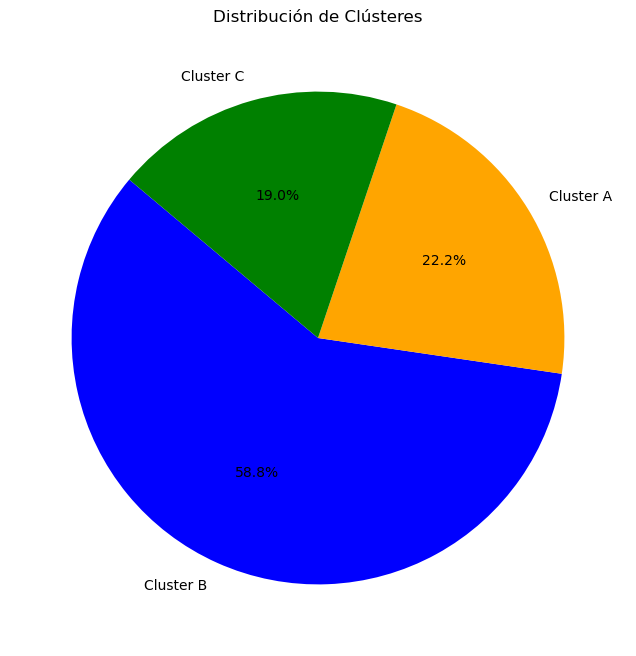

In [37]:
# Ejecutar la sección del código que genera el gráfico circular

color_mapping = {
    'Cluster A': 'orange',
    'Cluster B': 'blue',
    'Cluster C': 'green',
    'Ruido': 'gray'  # Opcional si manejas ruido
}

plt.figure(figsize=(8, 8))
plt.pie(
    cluster_label_counts,
    labels=cluster_label_counts.index,
    autopct='%1.1f%%',
    colors=[color_mapping.get(cluster, 'gray') for cluster in cluster_label_counts.index],
    startangle=140
)
plt.title("Distribución de Clústeres")
plt.show()

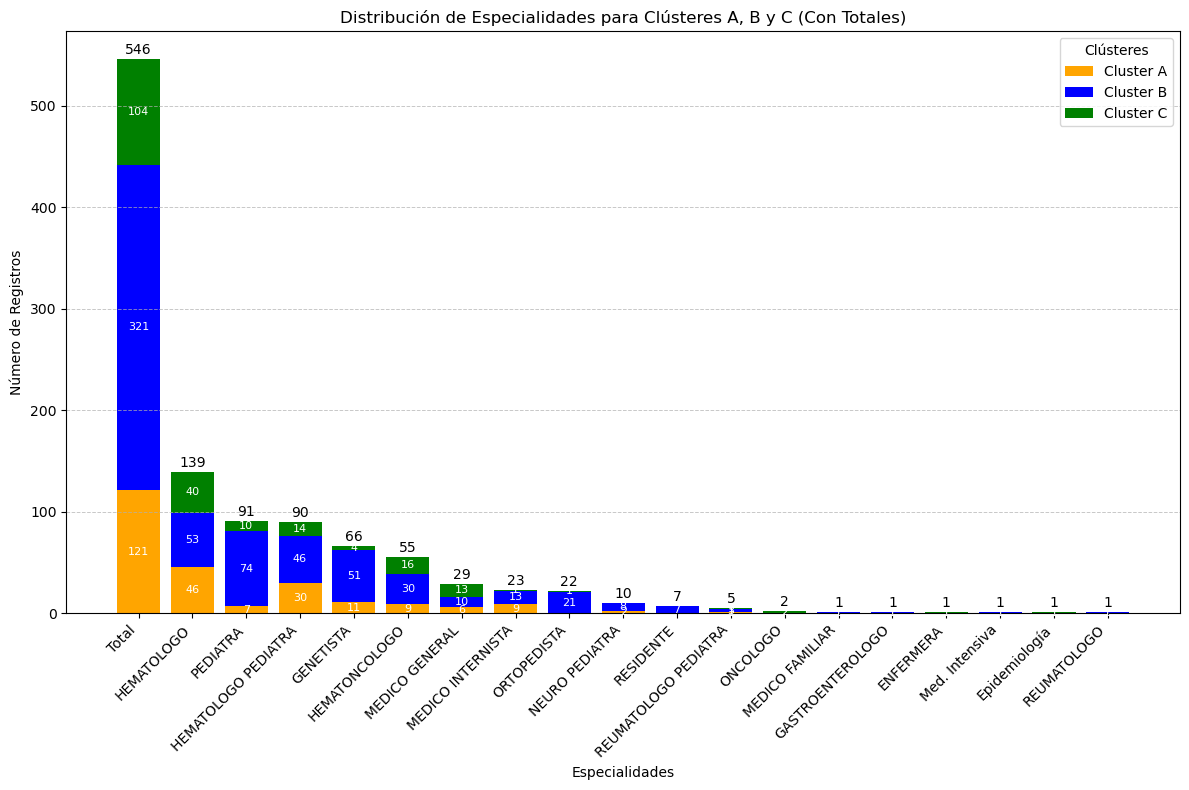

In [38]:
# Crear un gráfico de barras apiladas para los Clústeres A, B y C con etiquetas de datos y totales
plt.figure(figsize=(12, 8))

# Inicializar una lista para acumular alturas
heights = [0] * (len(especialidad_cluster_counts_sorted.index) - 1)  # Excluir la fila de totales

# Agregar cada clúster
for cluster in especialidad_cluster_counts_sorted.columns[:-1]:  # Excluir la columna de totales
    bar = plt.bar(
        especialidad_cluster_counts_sorted.index[:-1],  # Excluir la fila de totales
        especialidad_cluster_counts_sorted.loc[especialidad_cluster_counts_sorted.index[:-1], cluster],
        label=cluster,
        bottom=heights,
        color=color_mapping.get(cluster, 'gray')
    )

    # Actualizar las alturas acumuladas
    heights = [h + b.get_height() for h, b in zip(heights, bar)]

    # Añadir etiquetas de datos
    for b in bar:
        height = b.get_height()
        if height > 0:  # Añadir etiquetas solo para valores significativos
            plt.text(
                b.get_x() + b.get_width() / 2.0,
                b.get_y() + height / 2.0,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )

# Añadir etiquetas de totales encima de las barras
for i, total in enumerate(heights):
    plt.text(
        i, total + 2,  # Espaciado adicional para los totales
        f'{int(total)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Configurar el gráfico
plt.title("Distribución de Especialidades para Clústeres A, B y C (Con Totales)")
plt.xlabel("Especialidades")
plt.ylabel("Número de Registros")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Clústeres", loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

# Conclusiones

## 1. Distribución General de Clústeres
- **Cluster B** es el predominante, representando un **59% del total de registros**.
- **Cluster A** sigue con un **22%**, mientras que **Cluster C** abarca el restante **19%**.
- Esto sugiere que el comportamiento característico del Cluster B está más presente en los datos.

## 2. Distribución de Especialidades por Clúster
- **Hematólogo** es la especialidad más representada, con un total de **139 registros**, seguida de **Pediatra** (**91 registros**) y **Hematólogo Pediatra** (**90 registros**).
- **Cluster B** domina en todas las especialidades principales, lo que indica que este clúster engloba patrones comunes en estas especialidades.

## 3. Gráfico Circular (Distribución de Clústeres)
- Refuerza la predominancia del Cluster B, seguido por los Clústeres A y C, con proporciones más reducidas.

## 4. Gráfico de Barras Apiladas (Distribución de Especialidades)
- **Hematólogos y Pediatras** tienen una representación notable en todos los clústeres.
- **Cluster B** es significativo en casi todas las especialidades, excepto en las menos representadas como **Enfermera**, **Reumatólogo Pediatra**, y **Gastroenterólogo**, que tienen una representación equilibrada en los clústeres.

---

## Interpretación General
La distribución desigual de los clústeres puede indicar que existen patrones de práctica clínica o grupos de pacientes que dominan en la mayoría de las especialidades (Cluster B). Sin embargo, la presencia de Clústeres A y C sugiere subgrupos con características distintas que podrían estar vinculados a nichos específicos dentro de estas especialidades.